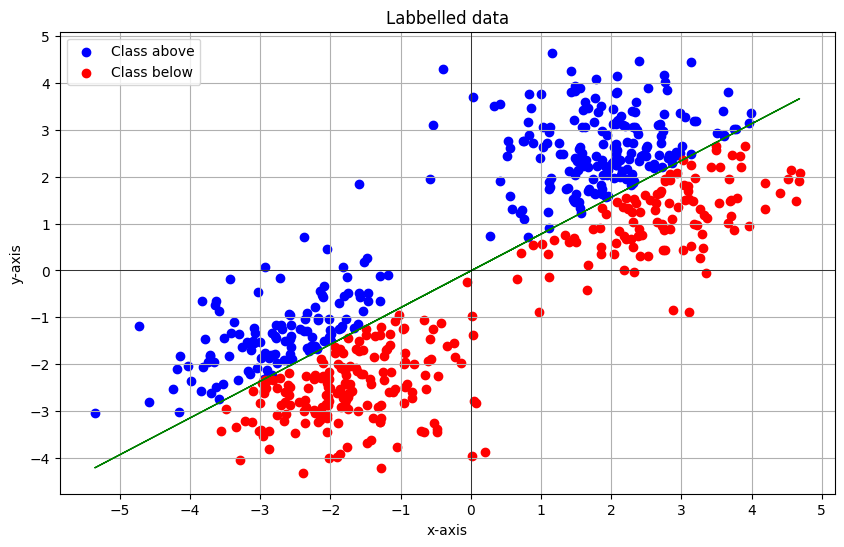

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import zip_longest


file = "unlabelled_data.csv"


# Defines a function that creates a list of tuples by opening a file
def read_file_data(path):
    xy = []
    with open(path) as unlabelled_data:
        for each_unlabelled_data in unlabelled_data:
            splited_each_unlabelled_data = each_unlabelled_data.split(",")
            x = float(splited_each_unlabelled_data[0])
            y = float(splited_each_unlabelled_data[1])
            xy.append((x, y))
        return xy
    
    
# Creating variable with function using unlabelled_data.csv as a path
x_y = read_file_data(file)



# Creating variables representing x and y varies separate and converting them to numpys array datatype to make it lighter in memory and more efficient towards upcoming polyfit\plot functions   
x_side = np.array([x for x, _ in x_y])
y_side = np.array([y for _, y in x_y])
k_, m_ = np.polyfit(x_side, y_side, 1)
    

# Creating a function that takes axis, slope and intercept as argument and determines if the line is above or below in y axis. works only on first degree linear equations.
def validate_position_1st_deg(x, y, k, m):
    line_y = k * x + m
    if y > line_y:
        return "above"
    else:
        return "below"
    

# Creating the function that sets the positions of multiple points relative to a line and returns the list of tuples added on above and below the line. 
def positions_dots_1st_deg(xy, k, m):
    above = []
    below = []
    for each_x, each_y in xy:    
        position = validate_position_1st_deg(each_x, each_y, k, m)
        if position == "above":
            above.append((each_x, each_y))
        else:
            below.append((each_x, each_y))
    return above, below


# Creating the variables by using the costom functions with arguments that recieved through the unlabelled_data.csv file.        
above_list, below_list = positions_dots_1st_deg(x_y, k_, m_)



# Creating variable write-file which creates and overwrites the csv file. Imported Itertools its zip_longest function to be able to zip the two lists even if the shorter one has reached its end.
# Writes the costom string instead of None to be able to tell that class 1 has reached its end. 
with open("labelled_data.csv", "w") as write_file:
    write_file.write("X-axis; Y-axis; Class\n")
    for above, below in zip_longest(above_list, below_list, fillvalue ="Class 1 data has ended"):
        if below != "Class 1 data has ended":
            write_file.write(f"{above[0]}; {above[1]}; above\n")
            write_file.write(f"{below[0]}; {below[1]}; below\n")
        else:
            write_file.write(f"{above[0]}; {above[1]}; above\n")
       
       
 # Variables created with list of comphrensions to make the plt scatter input valid and more readable.                                    
above_x = [x for x, _ in above_list]      
above_y = [y for _, y in above_list]      
below_x = [x for x, _ in below_list]      
below_y = [y for _, y in below_list]      


# Changes the size of the plot figure, Adds dots on with different colors to represent the 2 classes and also different color to show their differences. 
# Plots the line with costom color and line width and moves the legend to different side to make the dots more visable.
plt.figure(figsize=(10, 6))  
plt.scatter(above_x, above_y, color="blue", label="Class above")
plt.scatter(below_x, below_y, color="red", label="Class below")
plt.plot(x_side, k_ * x_side + m_, color ="green", lw=1)
plt.legend(loc='upper left')


# Labeling the axis and title
plt.xlabel("x-axis")        
plt.ylabel("y-axis")   
plt.title("Labbelled data")


# Variables for the each axis lowest and highest values with increment of 1 and adding those inside ticks to make it more precise visable plt functions. 
x_values = tuple(range(round(min(x_side)), round(max(x_side))+1))
y_values = tuple(range(round(min(y_side)), round(max(y_side))+1))
plt.xticks(x_values)
plt.yticks(y_values)


# Adds the grid and straight lines horizontal and vertical making it easier to see where the dots are in the axis.
plt.grid()
plt.axhline(0, color="black", lw=0.5)
plt.axvline(0, color="black", lw=0.5)

# Opens it to the screen
plt.show()